## Import Dependancies

In [57]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KDTree
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import confusion_matrix, classification_report


In [31]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()


,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,DIED,L_THREAT,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,33.0,26-35,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,64.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,37.0,36-45,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [32]:
severity = data_df['SEVERITY_LEVEL'].unique()


## Prep Data For Model

In [42]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL', 'DIED', 'L_THREAT', 'AGE_YRS', 'AGE_GROUP'], axis=1)
X


,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0


In [43]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y


array([0, 0, 0, ..., 2, 1, 1])

In [44]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
X_train

,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
9280,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1,0,0,0,0,0,0,0,0
1067,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
18597,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,1,0,0,0,0,0
17354,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20691,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
5699,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
10742,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,1,0,0,0,0,0,0,0
16921,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,1,0,0,0,0,0


In [45]:
# Scaling the train data with StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Testing KNN to Determine Best k value

k: 1, Train/Test Score: 0.859/0.827
k: 3, Train/Test Score: 0.892/0.883
k: 5, Train/Test Score: 0.899/0.893
k: 7, Train/Test Score: 0.900/0.897
k: 9, Train/Test Score: 0.900/0.898
k: 11, Train/Test Score: 0.900/0.897
k: 13, Train/Test Score: 0.900/0.897
k: 15, Train/Test Score: 0.900/0.899
k: 17, Train/Test Score: 0.900/0.899
k: 19, Train/Test Score: 0.900/0.899


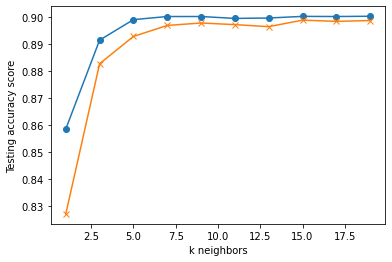

In [46]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()


Based on the scores above, we will move forward with 5 neighbors for our model. This was run on 3 random states (33, 42, 7) and all began to stabilize at k=5. 

## Create KNN Model 

In [47]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=5 Test Acc: 0.893


In [48]:
X.columns


Index(['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M',
       'JANSSEN', 'MODERNA', 'PFIZER', 'VAX_DOSE_SERIES_1',
       'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35',
       '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96 +'],
      dtype='object')

In [49]:
# Sample Prediction 1
sample_user1 = [[0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0]]
predicted_symptoms = knn.predict(sample_user1)
print(severity[predicted_symptoms])


['MILD']


In [50]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query(sample_user1, k=100)

#convery ndarry to list 
like_users = ind[0].tolist()
print(like_users)  # indices of 5 closest neighbors


[5421, 6329, 19238, 3158, 12221, 20622, 2365, 6325, 12530, 15023, 14602, 20363, 18004, 21448, 21829, 4837, 5086, 7091, 337, 335, 9524, 16324, 4516, 12200, 2051, 167, 10237, 14879, 8516, 13048, 8460, 13330, 13042, 4614, 10198, 4657, 7031, 6951, 4507, 8848, 7045, 4831, 348, 8382, 12222, 11861, 543, 10896, 1446, 1797, 8391, 8579, 5819, 5805, 4968, 8356, 4972, 4389, 5186, 7216, 7214, 5195, 7293, 5221, 8892, 186, 10784, 1744, 8358, 4715, 4724, 4635, 7035, 3340, 4763, 6931, 12479, 4457, 4147, 8828, 5352, 7027, 7642, 5019, 8870, 3017, 4953, 377, 584, 12019, 11585, 4720, 10176, 8219, 11668, 11214, 8357, 12790, 12627, 4662]


In [51]:
# save nearest 50 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['SYMPTOM'].iloc[like_users].tolist()
predicted_symptoms[:5]


['Chills',
 'Injection site pain',
 'Injection site pruritus',
 'Nausea',
 'Pyrexia']

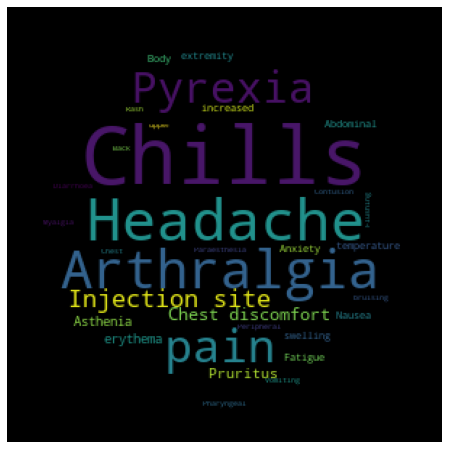

In [52]:
#convert list to string and generate
unique_string=(" ").join(predicted_symptoms)

#create circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width = 1000, height = 500, mask=mask).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [80]:
# Sample Prediction 2
sample_user2 = [[0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]]
predicted_symptoms = knn.predict(sample_user2)
print(severity[predicted_symptoms])


['MILD']


In [81]:
tree = KDTree(X)
ind = tree.query([[1.25, 1.35]], k=5)
print(ind)  # indices of 5 closest neighbors


print('People like you reported the following symptoms:')


ValueError: query data dimension must match training data dimension

# Save the Model

In [101]:
# save model
with open(f'../knn_model.pickle', 'wb') as f:
    pickle.dump(knn, f)
    

# Practice Input

In [68]:
features_np = ['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN', 'MODERNA', 'PFIZER',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95',
       '96 +']
user_input = np.zeros(len(features_np))


In [96]:
age_group = '36-45'
sex = 'F'
other_meds = 0
cur_ill = 0
history = 0
prior_vax = 0
allergies = 0
vax_name = 'PFIZER'
vax_dose = '2'
vax_site = 'LA'

age_idx = features_np.index(f'{age_group}')
sex_idx = features_np.index(f'{sex}')
vax_idx = features_np.index(f'{vax_name}')
dose_idx = features_np.index(f'VAX_DOSE_SERIES_{vax_dose}')
site_idx = features_np.index(f'VAX_SITE_{vax_site}')

user_input[0] = other_meds
user_input[1] = cur_ill
user_input[2] = history
user_input[3] = prior_vax
user_input[4] = allergies
user_input[sex_idx] = 1
user_input[vax_idx] = 1
user_input[dose_idx] = 1
user_input[age_idx] = 1
user_input[site_idx] = 1


print(user_input)


[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Predict

In [72]:
# Real Prediction
user_test = user_input
predicted_symptoms = knn.predict([user_test])
print(severity[predicted_symptoms])

['MILD']


In [74]:
user_input2 = np.zeros(len(features_np))

In [97]:
age_group = '96 +'
sex = 'M'
other_meds = 1
cur_ill = 1
history = 1
prior_vax = 1
allergies = 1
vax_name = 'PFIZER'
vax_dose = '1'
vax_site = 'LA'

age_idx = features_np.index(f'{age_group}')
sex_idx = features_np.index(f'{sex}')
vax_idx = features_np.index(f'{vax_name}')
dose_idx = features_np.index(f'VAX_DOSE_SERIES_{vax_dose}')
site_idx = features_np.index(f'VAX_SITE_{vax_site}')

user_input[0] = other_meds
user_input[1] = cur_ill
user_input[2] = history
user_input[3] = prior_vax
user_input[4] = allergies
user_input[sex_idx] = 1
user_input[vax_idx] = 1
user_input[dose_idx] = 1
user_input[age_idx] = 1
user_input[site_idx] = 1


print(user_input2)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [98]:
# Real Prediction
user_test2 = user_input2
predicted_symptoms2 = knn.predict([user_test2])
print(severity[predicted_symptoms2])

['MILD']


In [99]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query([user_input2], k=100)

#convery ndarry to list 
like_users2 = ind[0].tolist()
print(like_users2)  # indices of 5 closest neighbors


[9039, 25025, 12340, 22148, 1885, 25626, 2006, 26129, 19231, 22963, 8181, 2805, 17045, 9821, 16774, 18737, 11603, 6795, 3460, 19837, 14748, 8050, 13736, 9964, 8506, 2215, 2564, 13329, 20056, 8198, 3597, 15085, 12041, 1846, 17200, 13479, 7634, 3459, 22611, 5405, 23094, 23687, 23892, 16594, 18263, 20608, 25801, 13575, 13522, 6697, 11071, 10790, 11524, 2554, 16346, 16982, 11192, 3596, 9592, 15834, 3895, 10110, 26389, 19021, 23630, 742, 12852, 12949, 1884, 22100, 22945, 11168, 6873, 3454, 10489, 10861, 481, 19540, 10495, 19584, 19427, 10587, 23384, 8898, 20237, 23708, 23986, 6665, 23833, 6523, 2189, 4310, 6161, 11508, 23558, 11570, 33, 5605, 10169, 10167]


In [100]:
# save nearest 50 neighbors symptoms as list for wordcloud
predicted_symptoms2 = data_df['SYMPTOM'].iloc[like_users2].tolist()
predicted_symptoms2[:5]

['Tremor', 'Lethargy', 'Pyrexia', 'Decreased appetite', 'Diarrhoea']

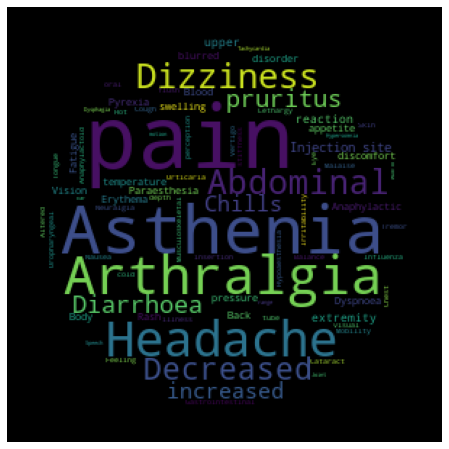

In [91]:
#convert list to string and generate
unique_string=(" ").join(predicted_symptoms2)

#create circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width = 1000, height = 500, mask=mask).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()
